In [1]:
import sys
sys.path.insert(0, '../third/xgboost/python-package/build/lib/')

In [2]:
%pylab inline
import pandas as pd
import xgboost as xgb

Populating the interactive namespace from numpy and matplotlib


In [3]:
xgb.__file__

'../third/xgboost/python-package/build/lib/xgboost/__init__.pyc'

In [4]:
xgb.__version__

'0.6'

In [5]:
df=pd.read_csv('../input/train.csv',index_col=0)

In [6]:
df=df.loc[np.random.permutation(df.index)]

In [7]:
df.shape

(595212, 58)

In [26]:
df.isnull().sum().sum()

0

In [8]:
trainx=df.drop(['target'],axis=1)
trainy=df['target']

In [9]:
trainx.shape

(595212, 57)

In [10]:
595212*.8

476169.60000000003

In [11]:
split = 500*1000
x_train, y_train, x_valid, y_valid = trainx[:split], trainy[:split], trainx[split:], trainy[split:]

print('Building DMatrix...')

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)




Building DMatrix...


In [12]:
x_train.shape,x_valid.shape

((500000, 57), (95212, 57))

In [13]:
print('Training ...')

params = {}
params['eta'] = 0.1
params['objective'] = 'binary:logistic'
#params['objective'] = 'reg:abs'
params['eval_metric'] = 'auc'
params['max_depth'] = 4
params['silent'] = 1
params['nthread']=4
#params['gamma'] = 2
#params['min_child_weight']=50
#params['tree_method']='hist'

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
%time clf = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=50,verbose_eval=10)


Training ...
[0]	train-auc:0.596186	valid-auc:0.59375
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[10]	train-auc:0.617879	valid-auc:0.61798
[20]	train-auc:0.623153	valid-auc:0.621472
[30]	train-auc:0.632005	valid-auc:0.627775
[40]	train-auc:0.638389	valid-auc:0.630399
[50]	train-auc:0.644158	valid-auc:0.633408
[60]	train-auc:0.648894	valid-auc:0.634967
[70]	train-auc:0.652201	valid-auc:0.636603
[80]	train-auc:0.655069	valid-auc:0.637647
[90]	train-auc:0.657737	valid-auc:0.638409
[100]	train-auc:0.660248	valid-auc:0.639188
[110]	train-auc:0.662226	valid-auc:0.63932
[120]	train-auc:0.664352	valid-auc:0.639149
[130]	train-auc:0.666203	valid-auc:0.639311
[140]	train-auc:0.668004	valid-auc:0.639512
[150]	train-auc:0.670019	valid-auc:0.63968
[160]	train-auc:0.671748	valid-auc:0.639198
[170]	train-auc:0.673662	valid-auc:0.639197
[180]	train-auc:0.675432	valid-auc:0.639003
[190]	train-auc:0.67721

In [14]:
clf.best_ntree_limit

146

In [15]:
print clf.get_dump(dump_format='text')[7]

0:[ps_car_13<0.900364] yes=1,no=2,missing=1
	1:[ps_ind_17_bin<1] yes=3,no=4,missing=3
		3:[ps_reg_03<0.781225] yes=7,no=8,missing=7
			7:[ps_car_13<0.666144] yes=15,no=16,missing=15
				15:leaf=-0.123446
				16:leaf=-0.119808
			8:[ps_ind_05_cat<2] yes=17,no=18,missing=17
				17:leaf=-0.117459
				18:leaf=-0.106712
		4:[ps_ind_03<1] yes=9,no=10,missing=9
			9:[ps_car_04_cat<2] yes=19,no=20,missing=19
				19:leaf=-0.0821878
				20:leaf=0.0325399
			10:[ps_car_03_cat<0] yes=21,no=22,missing=21
				21:leaf=-0.116203
				22:leaf=-0.107117
	2:[ps_ind_17_bin<1] yes=5,no=6,missing=5
		5:[ps_ind_05_cat<0] yes=11,no=12,missing=11
			11:[ps_calc_02<0.45] yes=23,no=24,missing=23
				23:leaf=-0.0519493
				24:leaf=-0.0942914
			12:[ps_car_13<1.49595] yes=25,no=26,missing=25
				25:leaf=-0.113471
				26:leaf=-0.100672
		6:[ps_ind_15<8] yes=13,no=14,missing=13
			13:[ps_ind_05_cat<5] yes=27,no=28,missing=27
				27:leaf=-0.0985301
				28:leaf=-0.0674804
			14:[ps_ind_05_cat<2] yes=29,no=30,missing=29

In [16]:
import json
trees=[json.loads(u) for u in clf.get_dump(dump_format='json')[:clf.best_ntree_limit]]
len(trees)

146

In [17]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [18]:
tree= (trees[7])

In [19]:
g=nx.DiGraph()

In [20]:
def addNode(node):
    g.add_node(node['nodeid'])
    if 'children' in node:
        for u in node['children']:
            addNode(u)
addNode(tree)            

In [21]:
def addEdge(node):
    n1=node['nodeid']
    if 'children' in node:
        for u in node['children']:
            g.add_edge(n1,u['nodeid'])
            addEdge(u)
addEdge(tree)            

/home/spark/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/spark/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/spark/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/spark/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

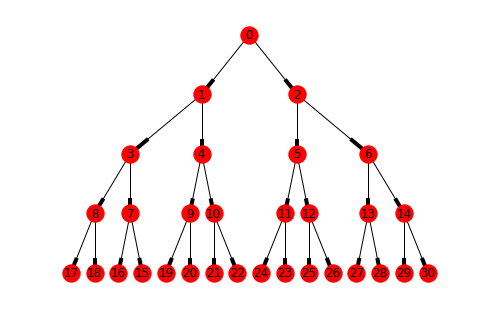

In [22]:
pos=graphviz_layout(g, prog='dot')
nx.draw(g,pos,with_labels=True)

In [23]:
def parse_tree_(node):
    if 'leaf' in node:
        return [[]]
    nodeid=node['nodeid']
    split=node['split']
    split_cond=node['split_condition']
    yes=node['yes']
    no=node['no']
    missing=node['missing']
    children1=parse_tree_([u for u in node["children"] if u['nodeid']==yes][0])
    children2=parse_tree_([u for u in node["children"] if u['nodeid']==no][0])
    cond1=[('yes',split,split_cond)]
    cond2=[('no',split,split_cond)]
    if missing==yes:
        cond1.append(('missing',split))
    elif missing==no:
        cond2.append(('missing',split))
    else:
        raise 2
    ret1=[[cond1]+u for u in children1]
    ret2=[[cond2]+u for u in children2]
    return ret1+ret2
    
def parse_tree(node):
    ret=parse_tree_(node)
    ret=[tuple(tuple(v) for v in u) for u in ret]
    return ret
        

In [24]:
parse_tree(trees[0])

[((('yes', u'ps_car_13', 0.900364), ('missing', u'ps_car_13')),
  (('yes', u'ps_ind_17_bin', 1), ('missing', u'ps_ind_17_bin')),
  (('yes', u'ps_reg_03', 0.781225), ('missing', u'ps_reg_03')),
  (('yes', u'ps_car_13', 0.679062), ('missing', u'ps_car_13'))),
 ((('yes', u'ps_car_13', 0.900364), ('missing', u'ps_car_13')),
  (('yes', u'ps_ind_17_bin', 1), ('missing', u'ps_ind_17_bin')),
  (('yes', u'ps_reg_03', 0.781225), ('missing', u'ps_reg_03')),
  (('no', u'ps_car_13', 0.679062),)),
 ((('yes', u'ps_car_13', 0.900364), ('missing', u'ps_car_13')),
  (('yes', u'ps_ind_17_bin', 1), ('missing', u'ps_ind_17_bin')),
  (('no', u'ps_reg_03', 0.781225),),
  (('yes', u'ps_ind_05_cat', 2), ('missing', u'ps_ind_05_cat'))),
 ((('yes', u'ps_car_13', 0.900364), ('missing', u'ps_car_13')),
  (('yes', u'ps_ind_17_bin', 1), ('missing', u'ps_ind_17_bin')),
  (('no', u'ps_reg_03', 0.781225),),
  (('no', u'ps_ind_05_cat', 2),)),
 ((('yes', u'ps_car_13', 0.900364), ('missing', u'ps_car_13')),
  (('no', u'ps

In [27]:
def enumerate_all_conds(tree):
    ret=[]
    cond_list=(parse_tree(tree))
    for cond in cond_list:
        for i in range(len(cond)):
            ret.append(cond[:i+1])
    return ret

In [28]:
cond_list=(enumerate_all_conds(trees[8]))
len(cond_list)

64

In [29]:
def value_cond_tuple (df,cond):
    #print cond
    col=cond[1]
    if cond[0]=='missing':
        return np.isnan(df[col])
    else:
        split_val=cond[2]
        if cond[0]=='yes':
            return df[col]<split_val
        elif cond[0]=='no':
            return df[col]>=split_val
        else:
            raise "never be here"
def value_cond_single(df,conds):
    return reduce(lambda u,v: u | v, [value_cond_tuple(df,cond) for cond in conds])
def value_cond(df,conds):
    return reduce(lambda u,v: u & v, [value_cond_single(df,cond) for cond in conds])
def value_trees(df,trees):
    cond_lists=reduce(lambda u,v: u+v, [enumerate_all_conds(tree) for tree in trees])
    cond_lists=list(set(cond_lists))
    print len(cond_lists)
    return cond_lists, pd.DataFrame([value_cond(df, conds) for conds in cond_lists]).T

In [30]:
len(trees)

146

In [31]:
%time a,b=value_trees(df,trees)

3528
CPU times: user 2min 14s, sys: 6 s, total: 2min 20s
Wall time: 2min 20s


In [32]:
b.shape

(595212, 3528)

In [33]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 641787 to 1466714
Columns: 3528 entries, Unnamed 0 to Unnamed 3389
dtypes: bool(3528)
memory usage: 2.0 GB


In [34]:
c=b.sum(0)

In [35]:
c.min()

4

In [36]:
len(a),len(b),b.shape

(3528, 595212, (595212, 3528))

In [37]:
X=b.values
y=trainy.values
X.shape,y.shape

((595212, 3528), (595212,))

In [56]:
np.mean(X),np.mean(y)

(0.11340819514860864, 0.036447517859182946)

In [38]:
def do_shuffle(X,y):
    idx = np.random.permutation(range(len(X)))
    X = X[idx]     
    y= y[idx]
    return X,y

In [49]:
# Define the gini metric - from https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703#5897
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_norm_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini_norm', gini_score

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini(labels, preds)
    return 'gini', gini_score

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [41]:
lr = LogisticRegression(C=1, penalty='l1', tol=0.01,n_jobs=-1)

In [42]:
%time lr.fit(X,y)

CPU times: user 40.1 s, sys: 13 s, total: 53.1 s
Wall time: 53.1 s


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)

In [44]:
np.mean(lr.coef_==0)

0.070011337868480725

In [45]:
lr = LogisticRegression(C=0.1, penalty='l1', tol=0.01,n_jobs=-1)
%time lr.fit(X,y)
np.mean(lr.coef_==0)

CPU times: user 41.9 s, sys: 13.1 s, total: 55 s
Wall time: 55 s


0.35374149659863946

In [46]:
np.sum(lr.coef_!=0)

2280

In [47]:
lr.score

<bound method LogisticRegression.score of LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)>

In [50]:
pred=lr.predict_proba(X)

In [55]:
roc_auc_score(y,pred[:,1]),gini(y,pred[:,1]),gini_normalized(y,pred[:,1])

(0.68258675377185729, 0.17593191980290729, 0.36517350754371458)